In [1]:
from keras.datasets import mnist
from keras.utils import np_utils

import numpy as np
import sys
import tensorflow as tf

seed = 0
np.random.seed(seed)
tf.random.set_seed(3)

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("학습셋 이미지 수 : %d 개" % (X_train.shape[0]))
print("테스트셋 이미지 수 : %d 개" % (X_test.shape[0]))

11493376/11490434 [==============================] - 0s 0us/step
학습셋 이미지 수 : 60000 개
테스트셋 이미지 수 : 10000 개


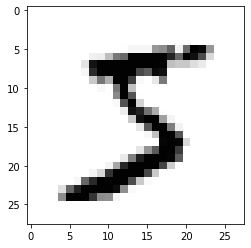

In [3]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0], cmap = 'Greys')
plt.show()

In [10]:
for x in X_train[0]:
    for i in x:
        sys.stdout.write('%d\t' % i)
    sys.stdout.write('\n')

0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	
0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	
0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	
0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	
0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	


In [12]:
X_train = X_train.reshape(X_train.shape[0], 784)
X_train = X_train.astype('float')
X_train = X_train / 255

X_test = X_test.reshape(X_test.shape[0], 784).astype('float') / 255

print("class : %d" % (y_train[0]))

class : 5


In [19]:
X_train.shape

(60000, 784)

In [20]:
y_train.shape

(60000,)

In [23]:
X_train[0].shape

(784,)

In [25]:
print("class : %d" % (y_train[2]))

class : 4


In [26]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

print(Y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping

import os

model = Sequential()
model.add(Dense(512, input_dim = 784, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

Model_Dir = './model/'
if not os.path.exists(Model_Dir):
    os.mkdir(Model_Dir)
    
modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath = modelpath, monitor = 'val_loss', verose = 1, save_best_only = True)
early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 10)

history = model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs = 30, batch_size = 200, verbose=1,
                   callbacks=[early_stopping_callback, checkpointer])

print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))


Epoch 1/30
300/300 [==============================] - 2s 4ms/step - loss: 2.0257 - accuracy: 0.4510 - val_loss: 36.2581 - val_accuracy: 0.7009
Epoch 2/30
300/300 [==============================] - 1s 3ms/step - loss: 0.8058 - accuracy: 0.8198 - val_loss: 47.5564 - val_accuracy: 0.7523
Epoch 3/30
300/300 [==============================] - 1s 3ms/step - loss: 0.5122 - accuracy: 0.8710 - val_loss: 56.9276 - val_accuracy: 0.7565
Epoch 4/30
300/300 [==============================] - 1s 3ms/step - loss: 0.4135 - accuracy: 0.8897 - val_loss: 57.9099 - val_accuracy: 0.7768
Epoch 5/30
300/300 [==============================] - 1s 3ms/step - loss: 0.3574 - accuracy: 0.9027 - val_loss: 55.9744 - val_accuracy: 0.7948
Epoch 6/30
300/300 [==============================] - 1s 3ms/step - loss: 0.3346 - accuracy: 0.9059 - val_loss: 52.6501 - val_accuracy: 0.8101
Epoch 7/30
300/300 [==============================] - 1s 3ms/step - loss: 0.3163 - accuracy: 0.9109 - val_loss: 49.6663 - val_accuracy: 0.8259

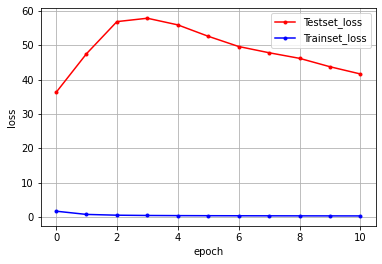

In [30]:
# 테스트 셋 오차
y_vloss = history.history['val_loss']
# 학습 셋 오차
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker = '.', c = 'red', label = 'Testset_loss')
plt.plot(x_len, y_loss, marker = '.', c = 'blue', label = 'Trainset_loss')

plt.legend(loc = 'upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


Epoch 00001: val_loss improved from inf to 0.14746, saving model to ./model1\01-0.1475.hdf5

Epoch 00002: val_loss improved from 0.14746 to 0.10214, saving model to ./model1\02-0.1021.hdf5

Epoch 00003: val_loss improved from 0.10214 to 0.08899, saving model to ./model1\03-0.0890.hdf5

Epoch 00004: val_loss improved from 0.08899 to 0.07836, saving model to ./model1\04-0.0784.hdf5

Epoch 00005: val_loss improved from 0.07836 to 0.07391, saving model to ./model1\05-0.0739.hdf5

Epoch 00006: val_loss improved from 0.07391 to 0.06782, saving model to ./model1\06-0.0678.hdf5

Epoch 00007: val_loss improved from 0.06782 to 0.06458, saving model to ./model1\07-0.0646.hdf5

Epoch 00008: val_loss improved from 0.06458 to 0.06273, saving model to ./model1\08-0.0627.hdf5

Epoch 00009: val_loss did not improve from 0.06273

Epoch 00010: val_loss improved from 0.06273 to 0.06203, saving model to ./model1\10-0.0620.hdf5

Epoch 00011: val_loss did not improve from 0.06203

Epoch 00012: val_loss did 

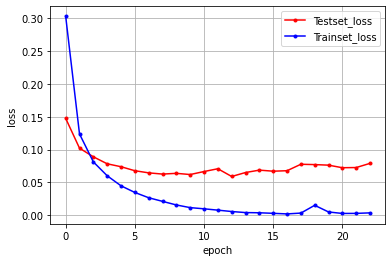

In [31]:
#-*- coding: utf-8 -*-

from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping

import matplotlib.pyplot as plt
import numpy
import os
import tensorflow as tf

# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.random.set_seed(3)

# MNIST 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], 784).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255

Y_train = np_utils.to_categorical(Y_train, 10)
Y_test = np_utils.to_categorical(Y_test, 10)

# 모델 프레임 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 실행 환경 설정
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# 모델 최적화 설정
MODEL_DIR = './model1/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model1/{epoch:02d}-{val_loss:.4f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

# 모델의 실행
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200, verbose=0, callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

# 테스트 셋의 오차
y_vloss = history.history['val_loss']

# 학습셋의 오차
y_loss = history.history['loss']

# 그래프로 표현
x_len = numpy.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label='Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label='Trainset_loss')

# 그래프에 그리드를 주고 레이블을 표시
plt.legend(loc='upper right')
# plt.axis([0, 20, 0, 0.35])
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()
